In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("/content/kaggle.json"))

FileNotFoundError: [Errno 2] No such file or directory: '/content/kaggle.json'

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:18<00:00, 250MB/s]
100% 2.70G/2.70G [00:20<00:00, 144MB/s]


In [ ]:
!ls

kaggle.json  new-plant-diseases-dataset.zip  sample_data


In [ ]:
with ZipFile("/content/new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)"))


print(len(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train")))
print(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train")[:5])

print(len(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid")))
print(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid")[:5])

print(len(os.listdir("/content/test/test")))
print(os.listdir("/content/test/test")[:5])

['valid', 'train']
38
['Grape___Black_rot', 'Tomato___Target_Spot', 'Grape___Esca_(Black_Measles)', 'Potato___Late_blight', 'Apple___Cedar_apple_rust']
38
['Grape___Black_rot', 'Tomato___Target_Spot', 'Grape___Esca_(Black_Measles)', 'Potato___Late_blight', 'Apple___Cedar_apple_rust']
33
['AppleScab2.JPG', 'TomatoYellowCurlVirus6.JPG', 'TomatoEarlyBlight3.JPG', 'PotatoEarlyBlight3.JPG', 'TomatoEarlyBlight5.JPG']


In [ ]:
#base_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

(256, 256, 3)


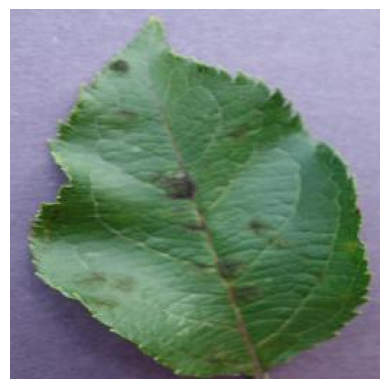

In [ ]:
image_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32
CHANNELS = 3
n_classes = 38

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create separate generators for each folder
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',           # ← your actual path to training data
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Validation generator
valid_generator = valid_datagen.flow_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    '/content/test/test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # For correct evaluation
)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 0 images belonging to 0 classes.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True
)


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,969,446 (18.96 MB)

 Trainable params: 4,969,446 (18.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)


Epoch 1/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 147s 67ms/step - accuracy: 0.9676 - loss: 0.0988 - val_accuracy: 0.9300 - val_loss: 0.2392
Epoch 2/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9062 - loss: 0.4367 - val_accuracy: 0.9275 - val_loss: 0.2495
Epoch 3/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9753 - loss: 0.0763 - val_accuracy: 0.9382 - val_loss: 0.2270
Epoch 4/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9688 - loss: 0.0363 - val_accuracy: 0.9381 - val_loss: 0.2255
Epoch 5/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9785 - loss: 0.0660 - val_accuracy: 0.9417 - val_loss: 0.2259
Epoch 6/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9375 - loss: 0.1659 - val_accuracy: 0.9416 - val_loss: 0.2287
Epoch 7/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - accuracy: 0.9828 - loss: 0.0553 - val_accuracy: 0.9464 - val_loss: 0.2233
Epoch 8/50
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 1.00

In [44]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(
    valid_generator,
    steps=valid_generator.samples // batch_size
)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
549/549 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9409 - loss: 0.5292
Validation Accuracy: 94.03%


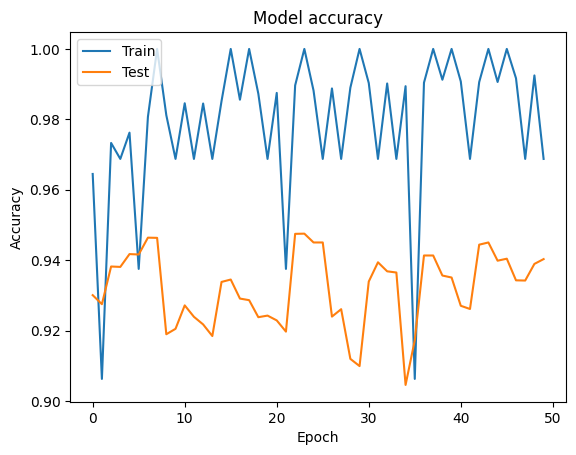

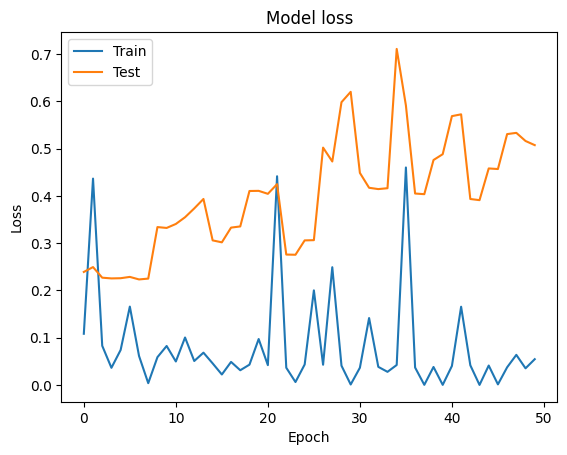

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [46]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [47]:
#class_indices = {v: k for k, v in train_generator.class_indices.items()}
# Original mapping: {'class_name': index}
class_indices = train_generator.class_indices

# Reversed mapping: {index: 'class_name'}
index_to_class = {v: k for k, v in class_indices.items()}

In [48]:
class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [49]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [50]:
# Invert class_indices
index_to_class = {v: k for k, v in class_indices.items()}

# Prediction function
def predict_image_class(model, image_path, class_indices):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Use inverted dict here
    predicted_class_name = index_to_class[predicted_class_index]
    return predicted_class_name


In [51]:
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}

predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class Name: Apple___Cedar_apple_rust


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


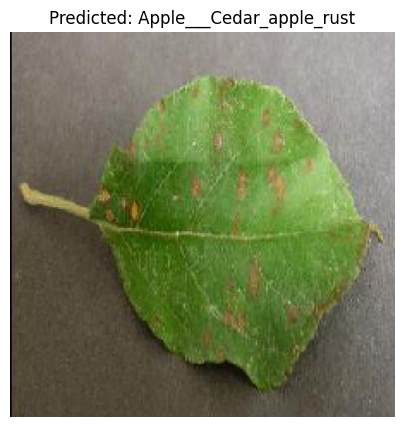

In [52]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image_class(model, image_path, class_indices):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 224, 224, 3)
    img_array = img_array / 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # ✅ Sort class names based on indices
    class_names = [k for k, v in sorted(class_indices.items(), key=lambda item: item[1])]
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name, img  # Return both label and image for display

# ✅ Image path
image_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655_270deg.JPG'

# ✅ Predict
predicted_class_name, img_display = predict_image_class(model, image_path, class_indices)

# ✅ Display image and predicted label
plt.figure(figsize=(5, 5))
plt.imshow(img_display)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_and_show(model, img_path, class_indices):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    pred = model.predict(img_array)
    idx_to_class = {v: k for k, v in class_indices.items()}
    pred_label = idx_to_class[np.argmax(pred)]

    plt.imshow(img)
    plt.title(f"Predicted: {pred_label}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


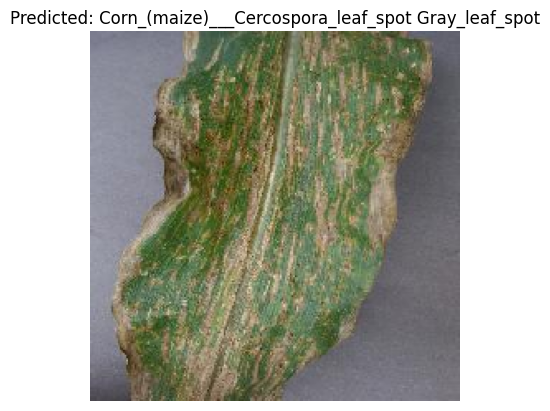

In [54]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655.JPG', class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


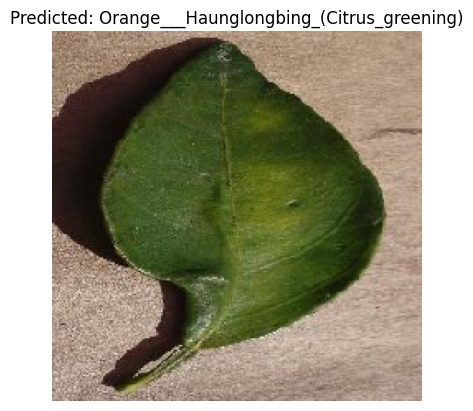

In [55]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)/01245345-5513-45d5-9990-2c5012a378f6___CREC_HLB 5672.JPG', class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


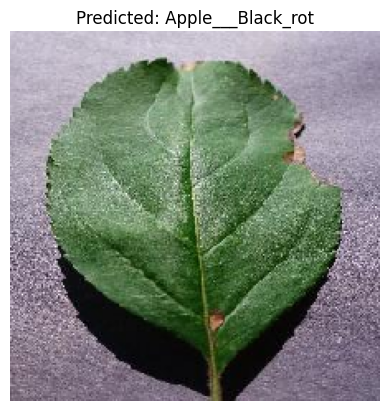

In [56]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot/01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG', class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


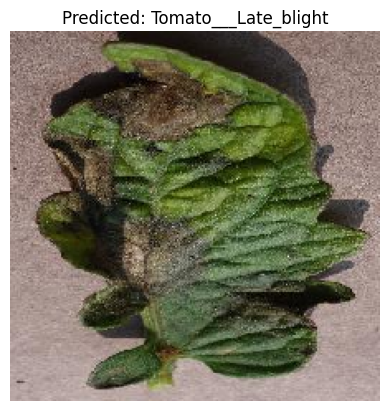

In [57]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/0524e8c4-56d9-41e2-b22d-33f22950ff93___RS_Late.B 5320.JPG', class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


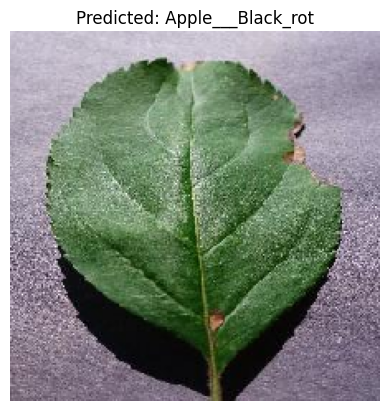

In [58]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___Black_rot/01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG', class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


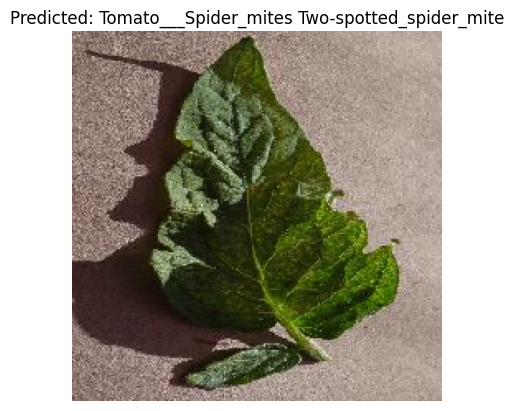

In [59]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite/05be6ebc-1641-4707-91da-9b5650b9641a___Com.G_SpM_FL 8857.JPG', class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


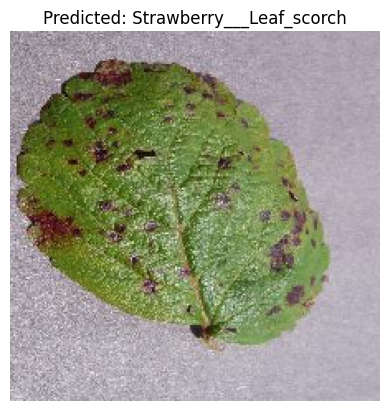

In [60]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___Leaf_scorch/0967e1a2-99fb-44e4-b940-60eb79da62b9___RS_L.Scorch 1247.JPG', class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


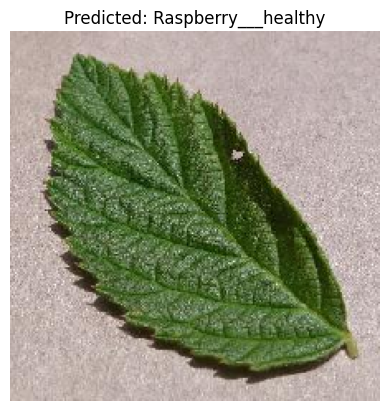

In [61]:
predict_and_show(model, '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Raspberry___healthy/0b504ebf-77ab-46a0-ab30-0da09d5e1c7b___Mary_HL 6389.JPG', class_indices)